In [8]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [9]:
#load cleansed data
df_analysis_workplace = pd.read_csv('/content/Cleansed_Data_v.3.csv')

In [11]:
df_analysis_workplace.loc[df_analysis_workplace['WorkplaceClosing'] == 0, 'WorkplaceClosing_Definition'] = 'No_Measure'
df_analysis_workplace.loc[df_analysis_workplace['WorkplaceClosing'] == 1, 'WorkplaceClosing_Definition'] = 'Recommend_Closing'
df_analysis_workplace.loc[df_analysis_workplace['WorkplaceClosing'] == 2, 'WorkplaceClosing_Definition'] = 'Require_Closing_Few'
df_analysis_workplace.loc[df_analysis_workplace['WorkplaceClosing'] == 3, 'WorkplaceClosing_Definition'] = 'Require_Closing_All'

In [13]:
df_analysis_workplace = df_analysis_workplace [['Country',
                                                   'State',
                                                   'Date',
                                                   'WorkplaceClosing_Definition',

                                                   ]]

In [15]:
df_workplace_graph = df_analysis_workplace.groupby(['State','WorkplaceClosing_Definition'])['Date'].count().reset_index(name='Counts')

In [20]:
df_graph_visual = pd.pivot_table(df_workplace_graph, values = 'Counts', index = ['State'],columns = 'WorkplaceClosing_Definition').reset_index()

In [21]:
df_graph_visual

WorkplaceClosing_Definition,State,Recommend_Closing,Require_Closing_All,Require_Closing_Few
0,Alabama,136.0,92.0,18.0
1,Alaska,165.0,33.0,48.0
2,Arizona,71.0,NaN,175.0
3,Arkansas,2.0,NaN,244.0
4,California,2.0,52.0,192.0
5,Colorado,NaN,34.0,212.0
6,Connecticut,1.0,58.0,187.0
7,Delaware,1.0,NaN,245.0
8,Florida,46.0,62.0,138.0
9,Georgia,146.0,NaN,100.0


Text(0, 0.5, 'Number of Days')

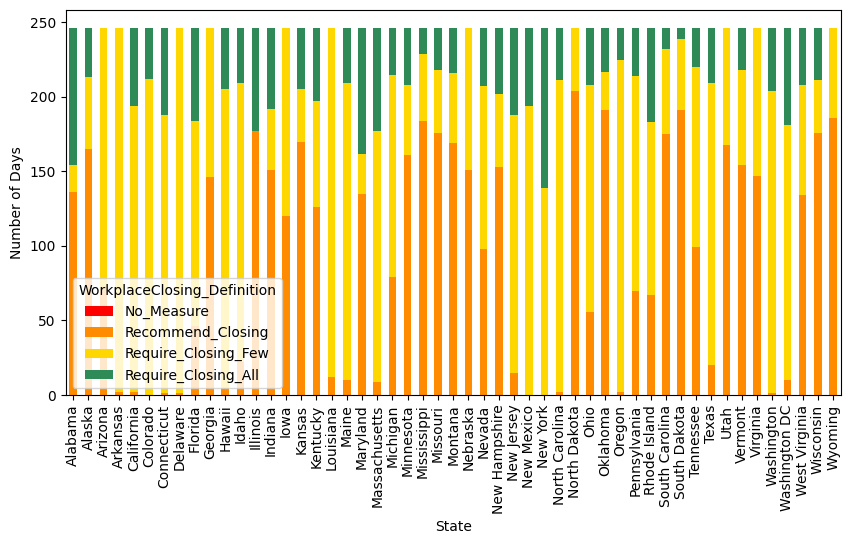

In [42]:
import matplotlib.pyplot as plt
if "No_Measure" not in df_graph_visual.columns:
  df_graph_visual = df_graph_visual.assign(No_Measure = 0)
colors = ["red", "darkorange","gold", "seagreen"]
df_graph_visual. plot(x = "State", y = ["No_Measure", "Recommend_Closing","Require_Closing_Few", "Require_Closing_All"], kind = "bar", stacked = "true", figsize = (10,5), color = colors)
plt.ylabel("Number of Days")
